## Libraries Required ##


In [22]:
import numpy as np # linear algebra
import pandas as pd # data processing from sklearn.model_selection import train_test_split
import seaborn as sns #data visuals
import matplotlib.pyplot as plt 

#required models
from sklearn.naive_bayes import MultinomialNB , GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

## About the dataset : ##

The csv file contains 5172 rows, each row for each email. There are 3002 columns. The first column indicates Email name. The name has been set with numbers and not recipients' name to protect privacy. The last column has the labels for prediction : 1 for spam, 0 for not spam. The remaining 3000 columns are the 3000 most common words in all the emails, after excluding the non-alphabetical characters/words. For each row, the count of each word(column) in that email(row) is stored in the respective cells. Thus, information regarding all 5172 emails are stored in a compact dataframe rather than as separate text files.

**Dataset taken from -** https://www.kaggle.com/datasets/balaka18/email-spam-classification-dataset-csv

## Importing Data ##

In [2]:
df = pd.read_csv("emails.csv")
df.head(10)

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0
5,Email 6,4,5,1,4,2,3,45,1,0,...,0,0,0,0,0,0,0,0,0,1
6,Email 7,5,3,1,3,2,1,37,0,0,...,0,0,0,0,0,0,0,0,0,0
7,Email 8,0,2,2,3,1,2,21,6,0,...,0,0,0,0,0,0,0,1,0,1
8,Email 9,2,2,3,0,0,1,18,0,0,...,0,0,0,0,0,0,0,0,0,0
9,Email 10,4,4,35,0,1,0,49,1,16,...,0,0,0,0,0,0,0,0,0,0


## Basic Data Analysis ##

In [3]:
df.isnull().sum()

Email No.     0
the           0
to            0
ect           0
and           0
             ..
military      0
allowing      0
ff            0
dry           0
Prediction    0
Length: 3002, dtype: int64

<Axes: >

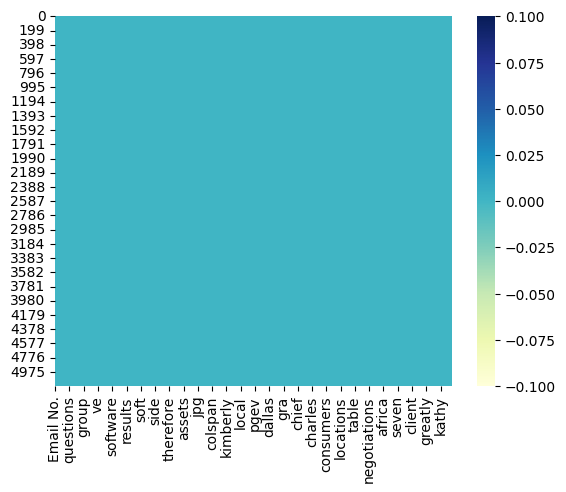

In [4]:
sns.heatmap(df.isnull() , cmap="YlGnBu")

In [5]:
df.describe()

,the,to,ect,and,for,of,a,you,hou,in,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
count,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,...,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000
mean,6.640565,6.188128,5.143852,3.075599,3.124710,2.627030,55.517401,2.466551,2.024362,10.600155,...,0.005027,0.012568,0.010634,0.098028,0.004254,0.006574,0.004060,0.914733,0.006961,0.290023
std,11.745009,9.534576,14.101142,6.045970,4.680522,6.229845,87.574172,4.314444,6.967878,19.281892,...,0.105788,0.199682,0.116693,0.569532,0.096252,0.138908,0.072145,2.780203,0.098086,0.453817
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,12.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,3.000000,1.000000,1.000000,2.000000,1.000000,28.000000,1.000000,0.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8.000000,7.000000,4.000000,3.000000,4.000000,2.000000,62.250000,3.000000,1.000000,12.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,210.000000,132.000000,344.000000,89.000000,47.000000,77.000000,1898.000000,70.000000,167.000000,223.000000,...,4.000000,7.000000,2.000000,12.000000,3.000000,4.000000,3.000000,114.000000,4.000000,1.000000


## For this dataset , models used are : ##
1. Naives Bayes
2. Support Vector Machines
3. Random Forests


## Creating Train and Test sets ##

In [7]:
X = df.iloc[:,1:3001]
y = df.iloc[:,-1].values
X , y 

(      the  to  ect  and  for  of    a  you  hou  in  ...  enhancements  \
 0       0   0    1    0    0   0    2    0    0   0  ...             0   
 1       8  13   24    6    6   2  102    1   27  18  ...             0   
 2       0   0    1    0    0   0    8    0    0   4  ...             0   
 3       0   5   22    0    5   1   51    2   10   1  ...             0   
 4       7   6   17    1    5   2   57    0    9   3  ...             0   
 ...   ...  ..  ...  ...  ...  ..  ...  ...  ...  ..  ...           ...   
 5167    2   2    2    3    0   0   32    0    0   5  ...             0   
 5168   35  27   11    2    6   5  151    4    3  23  ...             0   
 5169    0   0    1    1    0   0   11    0    0   1  ...             0   
 5170    2   7    1    0    2   1   28    2    0   8  ...             0   
 5171   22  24    5    1    6   5  148    8    2  23  ...             0   
 
       connevey  jay  valued  lay  infrastructure  military  allowing  ff  dry  
 0            0  

In [10]:
train_x,test_x,train_y,test_y = train_test_split(X,y,test_size = 0.25)

## Creating Models ##

In [23]:
def perform(y_pred):
    print("Precision : ", precision_score(test_y, y_pred))
    print("Recall : ", recall_score(test_y, y_pred))
    print("Accuracy Score : ", accuracy_score(test_y, y_pred))
    print("F1 Score : ", f1_score(test_y, y_pred))
    print("\n", confusion_matrix(test_y, y_pred))
    print("")
    
    cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(test_y, y_pred), display_labels=['Spam', 'Not Spam'] )
    cm_display.plot()
    plt.show()


## Naive Bayes(Multinomial) ##

Precision :  0.8674698795180723
Recall :  0.9375
Accuracy Score :  0.9389017788089714
F1 Score :  0.9011264080100124

 [[854  55]
 [ 24 360]]



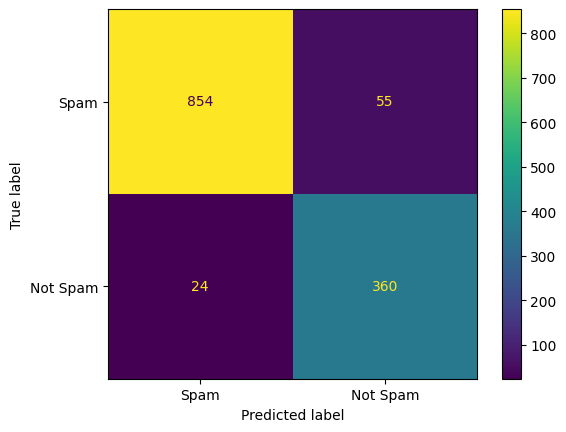

In [25]:
mnb = MultinomialNB(alpha=1.9)         
mnb.fit(train_x,train_y)
y_pred1 = mnb.predict(test_x)
perform(y_pred1)

## Naive Bayes(Gaussian) ##

Accuracy Score for Gaussian Naive Bayes : 0.9489559164733179
Precision :  0.8916256157635468
Recall :  0.9427083333333334
Accuracy Score :  0.9489559164733179
F1 Score :  0.9164556962025316

 [[865  44]
 [ 22 362]]



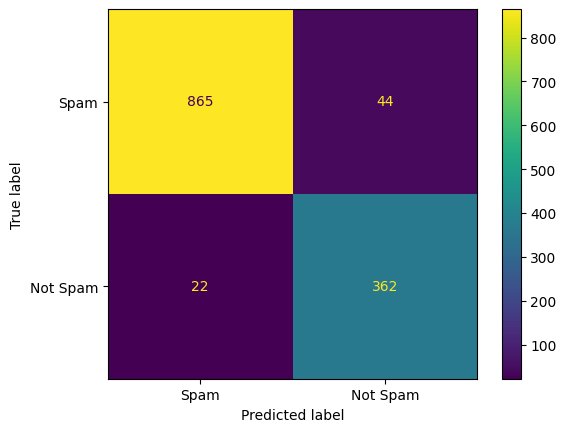

In [27]:
gnb = GaussianNB()
gnb.fit(train_x , train_y)
y_pred2 = gnb.predict(test_x)
print("Accuracy Score for Gaussian Naive Bayes :" , accuracy_score(y_pred2,test_y))
perform(y_pred2)

## Support Vector Machines ##

Accuracy Score for SVC :  0.9025522041763341
Precision :  0.9243421052631579
Recall :  0.7317708333333334
Accuracy Score :  0.9025522041763341
F1 Score :  0.8168604651162791

 [[886  23]
 [103 281]]



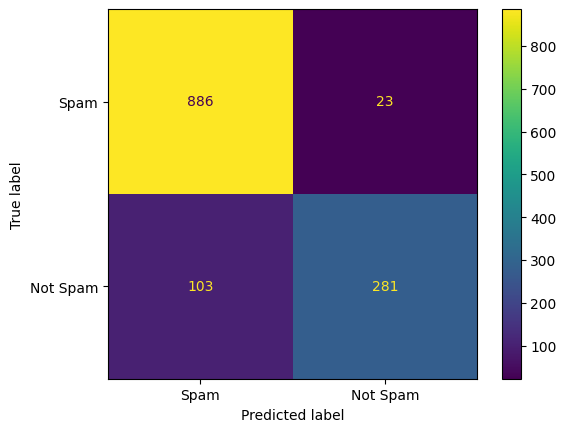

In [28]:
svc = SVC(C=1.0,kernel='rbf',gamma='auto')         
# As gamma and C increases, model overfits.
svc.fit(train_x,train_y)
y_pred3 = svc.predict(test_x)
perform(y_pred3)

## Random Forests ##


Precision :  0.9657894736842105
Recall :  0.9557291666666666
Accuracy Score :  0.9767981438515081
F1 Score :  0.9607329842931938

 [[896  13]
 [ 17 367]]



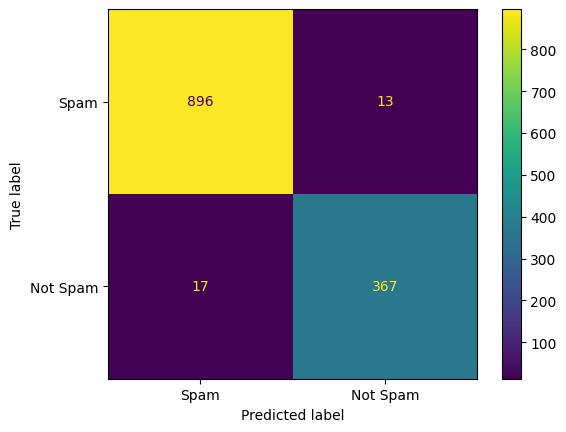

In [29]:
rfc = RandomForestClassifier(n_estimators=100,criterion='gini')
rfc.fit(train_x,train_y)
y_pred4 = rfc.predict(test_x)
perform(y_pred4)

As expected, Random Forest Classifier performs the best among the four. 